In [1]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
bitcoin = pd.read_csv('../data/external/bitcoin.csv', parse_dates=['Date'])
cardano = pd.read_csv('../data/external/cardano.csv', parse_dates=['Date'])
ethereum = pd.read_csv('../data/external/ethereum.csv', parse_dates=['Date'])

df = pd.concat([bitcoin, cardano, ethereum], axis=0)

In [3]:
df.shape

(6525, 10)

In [4]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
df.value_counts(['Symbol'])

Symbol
BTC       2991
ETH       2160
ADA       1374
dtype: int64

In [6]:
df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

## Data Exploration

### Bitcoin

In [6]:
print(f"Min Date: {df[df.Symbol == 'BTC'].Date.min()}, Max Date: {df[df.Symbol == 'BTC'].Date.max()}")

Min Date: 2013-04-29 23:59:59, Max Date: 2021-07-06 23:59:59


In [7]:
df[df.Symbol == 'BTC'].describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


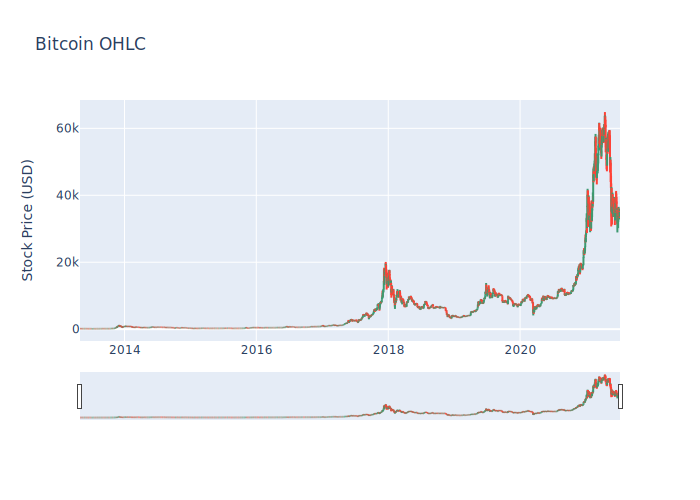

In [8]:
fig = go.Figure(data=go.Ohlc(x=df[df.Symbol == 'BTC']['Date'],
                open=df[df.Symbol == 'BTC']['Open'],
                high=df[df.Symbol == 'BTC']['High'],
                low=df[df.Symbol == 'BTC']['Low'],
                close=df[df.Symbol == 'BTC']['Close']))
fig.update_layout(
    title='Bitcoin OHLC',
    yaxis_title='Stock Price (USD)'
)
fig.show(renderer="svg")

## Cardano

In [9]:
print(f"Min Date: {df[df.Symbol == 'ADA'].Date.min()}, Max Date: {df[df.Symbol == 'ADA'].Date.max()}")

Min Date: 2017-10-02 23:59:59, Max Date: 2021-07-06 23:59:59


In [10]:
df[df.Symbol == 'ADA'].describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03,1.374000e+03
mean,687.500000,0.269807,0.239710,0.255287,0.256313,8.934183e+08,7.603454e+09
std,396.783946,0.433523,0.380928,0.408456,0.409691,2.107653e+09,1.303878e+10
min,1.000000,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08
25%,344.250000,0.047565,0.044601,0.045898,0.045947,5.014830e+07,1.191263e+09
50%,687.500000,0.090274,0.083164,0.086867,0.087002,1.186742e+08,2.270889e+09
75%,1030.750000,0.194519,0.172442,0.181374,0.183379,4.875977e+08,5.174547e+09
max,1374.000000,2.461766,2.013285,2.300190,2.309113,1.914198e+10,7.377224e+10


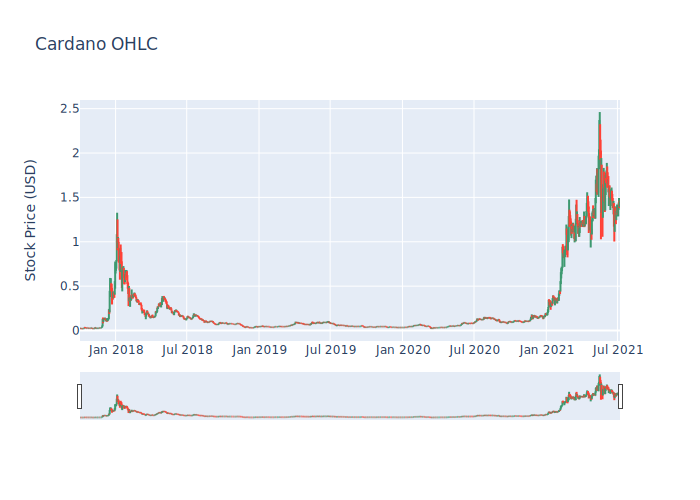

In [11]:
fig = go.Figure(data=go.Ohlc(x=df[df.Symbol == 'ADA']['Date'],
                open=df[df.Symbol == 'ADA']['Open'],
                high=df[df.Symbol == 'ADA']['High'],
                low=df[df.Symbol == 'ADA']['Low'],
                close=df[df.Symbol == 'ADA']['Close']))
fig.update_layout(
    title='Cardano OHLC',
    yaxis_title='Stock Price (USD)'
)
fig.show(renderer="svg")

## Ethereum

In [12]:
print(f"Min Date: {df[df.Symbol == 'ETH'].Date.min()}, Max Date: {df[df.Symbol == 'ETH'].Date.max()}")

Min Date: 2015-08-08 23:59:59, Max Date: 2021-07-06 23:59:59


In [13]:
df[df.Symbol == 'ETH'].describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


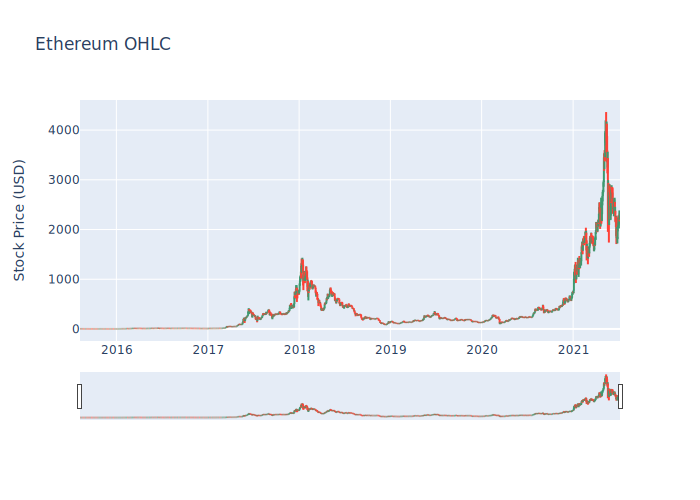

In [14]:
fig = go.Figure(data=go.Ohlc(x=df[df.Symbol == 'ETH']['Date'],
                open=df[df.Symbol == 'ETH']['Open'],
                high=df[df.Symbol == 'ETH']['High'],
                low=df[df.Symbol == 'ETH']['Low'],
                close=df[df.Symbol == 'ETH']['Close']))
fig.update_layout(
    title='Ethereum OHLC',
    yaxis_title='Stock Price (USD)'
)
fig.show(renderer="svg")

## Train Test Split

In [23]:
date_threshold = '2021-04-01'
train = df[df.Date < date_threshold]
test = df[df.Date >= date_threshold]
print(f'Train: {train.shape}, Test: {test.shape}, Proportion: {train.shape[0] / df.shape[0]:.2%}')

Train: (6234, 10), Test: (291, 10), Proportion: 95.54%


## Feature Engineering

TODO: Test min max scaler over windows

### Columns Selection

In [24]:
class ColumnDropTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [25]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [26]:
minmax_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())])

pipeline = Pipeline([
    ("column_dropper", ColumnDropTransformer(['SNo', 'Name'])),
    ('normalization', ColumnTransformer(
        remainder='passthrough',
        transformers=[
            ('mm', minmax_transformer , ['High', 'Low', 'Open', 'Close','Volume', 'Marketcap'])
        ]))
])

In [27]:
train = pipeline.fit_transform(train)

In [28]:
train[0]

array([0.0023906901581641727, 0.002259311720669535, 0.002195738911411989,
       0.0023598010859048656, 0.0, 0.001375737032009516, 'BTC',
       Timestamp('2013-04-29 23:59:59')], dtype=object)

### Coins Correlation

In [29]:
bitcoin_train = train[train[:,-2] == 'BTC']
cardano_train = train[train[:,-2] == 'ADA']
ethereum_train = train[train[:,-2] == 'ETH']

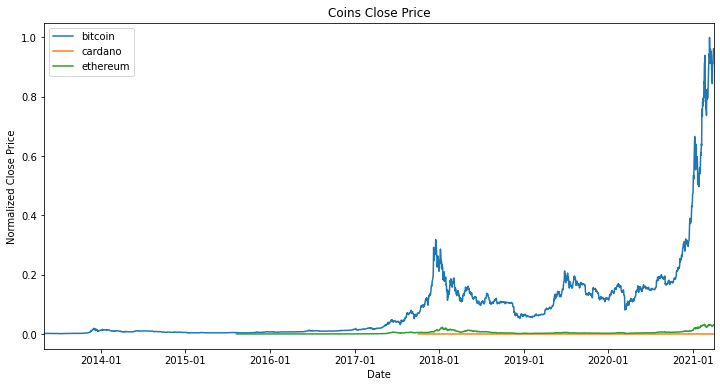

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(bitcoin_train[:,-1],bitcoin_train[:,3], label='bitcoin')
ax.plot(cardano_train[:,-1],cardano_train[:,3], label='cardano')
ax.plot(ethereum_train[:,-1],ethereum_train[:,3], label='ethereum')
ax.set(xlabel="Date",
       ylabel="Normalized Close Price",
       title="Coins Close Price",
       xlim=[min(train[:,-1]), max(train[:,-1])])
ax.legend(loc='best')

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.show()